In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Case Study 1: Tweeter Boom in 2008

In [2]:
COLUMNS = ['Sentiment', 'Id', 'Date', 'Flag', 'User', 'Tweet']

In [3]:
dataset = pd.read_csv('data/tweets.csv', names = COLUMNS, encoding = 'latin-1')

In [4]:
dataset.head()

,Sentiment,Id,Date,Flag,User,Tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [5]:
dataset.shape

(1048576, 6)

In [6]:
dataset.drop(['Id', 'Date', 'Flag', 'User'], axis = 1, inplace = True)

In [7]:
dataset.head()

,Sentiment,Tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [8]:
dataset['Sentiment'] == 4

0          False
1          False
2          False
3          False
4          False
           ...  
1048571     True
1048572     True
1048573     True
1048574     True
1048575     True
Name: Sentiment, Length: 1048576, dtype: bool

In [9]:
dataset['Sentiment'] = dataset['Sentiment'].map({4:1, 0:0})

In [10]:
dataset['Sentiment'] == 1

0          False
1          False
2          False
3          False
4          False
           ...  
1048571     True
1048572     True
1048573     True
1048574     True
1048575     True
Name: Sentiment, Length: 1048576, dtype: bool

In [11]:
dataset['Tweet'][1]

"is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!"

WordNet Lemmatizer: 
* https://www.machinelearningplus.com/nlp/lemmatization-examples-python/#:~:text=Wordnet%20Lemmatizer%20with%20NLTK%20Wordnet%20is%20an%20large%2C,of%20the%20earliest%20and%20most%20commonly%20used%20lemmatizers.

Porter Stemmer: 
* https://riptutorial.com/nltk/example/27393/porter-stemmer
* https://iq.opengenus.org/porter-stemmer/

Text(0.5, 1.0, 'Count of tweets for each sentiment')

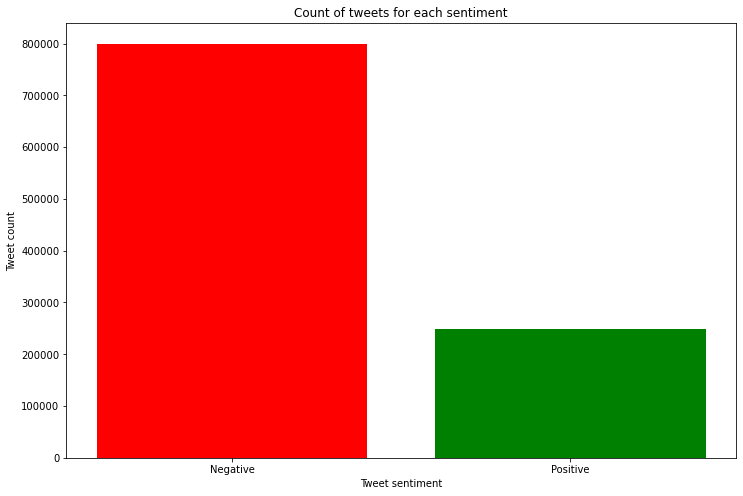

In [29]:
class_count = dataset['Sentiment'].value_counts()
plt.figure(figsize = (12, 8))
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.xticks([0, 1])
plt.bar(x = class_count.keys(), 
        height = class_count.values, 
        color = ['r', 'g'])
plt.xlabel("Tweet sentiment")
plt.ylabel("Tweet count")
plt.title("Count of tweets for each sentiment")

In [30]:
print(dataset['Clean_tweet'][20])

day get much done


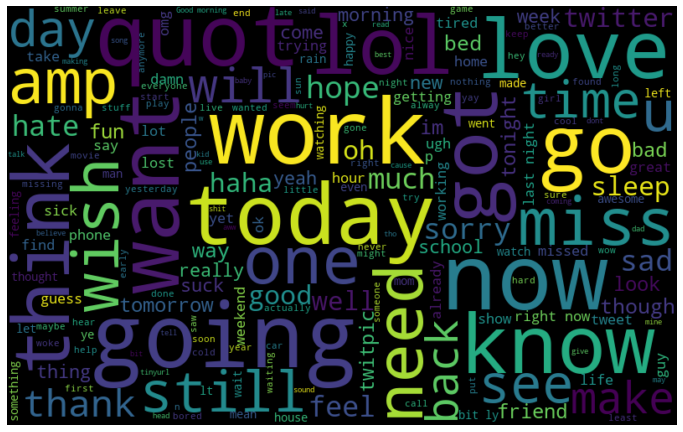

In [31]:
all_words = ' '.join([text for text in dataset['Tweet']])
wordcloud = WordCloud(width=800, height=500, random_state=21,
                      max_font_size=110).generate(all_words)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [32]:
positive_tweets = ' '.join(dataset[dataset['Sentiment'] == 1]['Tweet'].str.lower())
negative_tweets = ' '.join(dataset[dataset['Sentiment'] == 0]['Tweet'].str.lower())

Text(0.5, 1.0, 'Positive tweets Wordcloud')

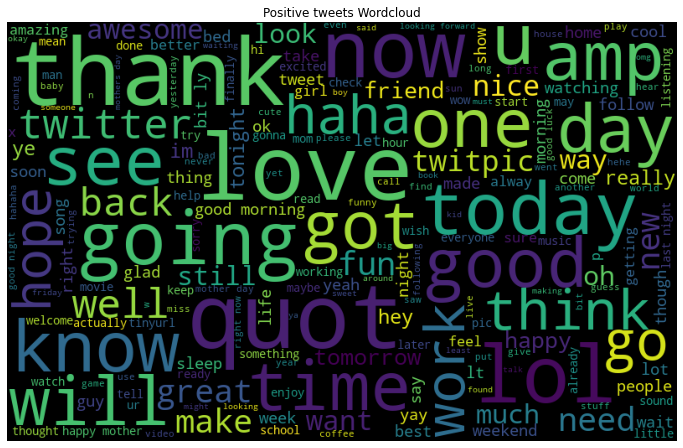

In [33]:
wordcloud = WordCloud(stopwords = STOPWORDS, width=800, height=500, 
                      random_state=42, max_font_size=110).generate(positive_tweets)
plt.figure(figsize = (12, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Positive tweets Wordcloud")

Text(0.5, 1.0, 'Negative tweets Wordcloud')

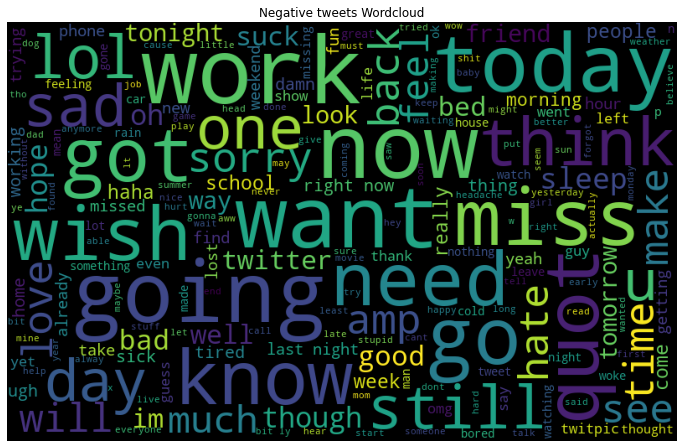

In [34]:
wordcloud = WordCloud(stopwords = STOPWORDS, width=800, height=500, 
                      random_state=42, max_font_size=110).generate(negative_tweets)
plt.figure(figsize = (12, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Negative tweets Wordcloud")

In [35]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [36]:
# extracting hashtags from non racist/sexist tweets

HT_regular = hashtag_extract(dataset['Tweet'][dataset['Sentiment'] == 1])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(dataset['Tweet'][dataset['Sentiment'] == 0])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

Now that we have prepared our lists of hashtags for both the sentiments, we can plot the top 'n' hashtags. So, first let’s check the hashtags in the non-racist/sexist tweets.

__Non-Racist/Sexist Tweets__

In [37]:
import seaborn as sns

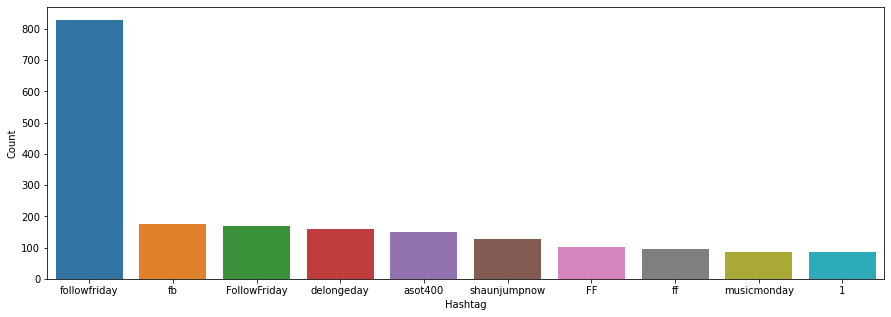

In [38]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(15,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

All these hashtags are positive and it makes sense. I am expecting negative terms in the plot of the second list. Let’s check the most frequent hashtags appearing in the racist/sexist tweets.

__Racist/Sexist Tweets__

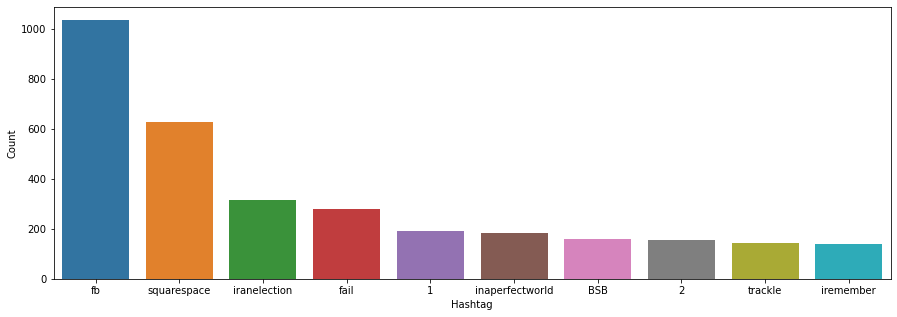

In [39]:
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})

# selecting top 10 most frequent hashtags
e = e.nlargest(columns="Count", n = 10)   
plt.figure(figsize=(15,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")

As expected, most of the terms are negative with a few neutral terms as well. So, it’s not a bad idea to keep these hashtags in our data as they contain useful information.

# Case Study 2: Trump Situation

In [40]:
dataset  = pd.read_csv('data/train_E6oV3lV.csv')
test = pd.read_csv('data/test_tweets_anuFYb8.csv')

## Text PreProcessing and Cleaning

### Data Inspection

Let's check out a few non racist/sexist tweets.

In [41]:
dataset.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [42]:
dataset.drop(['id'], axis = 1, inplace = True)

In [43]:
dataset['label'] == 0

0         True
1         True
2         True
3         True
4         True
         ...  
31957     True
31958     True
31959     True
31960    False
31961     True
Name: label, Length: 31962, dtype: bool

In [44]:
dataset[dataset['label'] == 0].head(10)

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
5,0,[2/2] huge fan fare and big talking before the...
6,0,@user camping tomorrow @user @user @user @use...
7,0,the next school year is the year for exams.ð...
8,0,we won!!! love the land!!! #allin #cavs #champ...
9,0,@user @user welcome here ! i'm it's so #gr...


<br>
Now check out a few racist/sexist tweets.

In [45]:
dataset[dataset['label'] == 1].head(10)

,label,tweet
13,1,@user #cnn calls #michigan middle school 'buil...
14,1,no comment! in #australia #opkillingbay #se...
17,1,retweet if you agree!
23,1,@user @user lumpy says i am a . prove it lumpy.
34,1,it's unbelievable that in the 21st century we'...
56,1,@user lets fight against #love #peace
68,1,ð©the white establishment can't have blk fol...
77,1,"@user hey, white people: you can call people '..."
82,1,how the #altright uses &amp; insecurity to lu...
111,1,@user i'm not interested in a #linguistics tha...


In [48]:
dataset.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [49]:
#removing user handles starting with "@"" and ","
dataset['Clean_tweet'] = dataset['tweet'].str.replace("@[\w]*","")

In [50]:
dataset.head()

,label,tweet,Clean_tweet
0,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,0,bihday your majesty,bihday your majesty
3,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation,factsguide: society now #motivation


In [51]:
#removing numbers and special characters
dataset['Clean_tweet'] = dataset['Clean_tweet'].str.replace("[^a-zA-Z' ]","")
dataset.head()

,label,tweet,Clean_tweet
0,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i can't use cause the...
2,0,bihday your majesty,bihday your majesty
3,0,#model i love u take with u all the time in ...,model i love u take with u all the time in u...
4,0,factsguide: society now #motivation,factsguide society now motivation


In [52]:
#removing urls
dataset['Clean_tweet'] = dataset['Clean_tweet'].replace(re.compile(r"((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))"), "")
dataset.head()

,label,tweet,Clean_tweet
0,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i can't use cause the...
2,0,bihday your majesty,bihday your majesty
3,0,#model i love u take with u all the time in ...,model i love u take with u all the time in u...
4,0,factsguide: society now #motivation,factsguide society now motivation


In [53]:
#removing single characters
dataset['Clean_tweet'] = dataset['Clean_tweet'].replace(re.compile(r"(^| ).( |$)"), " ")
dataset.head()

,label,tweet,Clean_tweet
0,0,@user when a father is dysfunctional and is s...,when father is dysfunctional and is so selfis...
1,0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit can't use cause they d...
2,0,bihday your majesty,bihday your majesty
3,0,#model i love u take with u all the time in ...,model i love take with all the time in ur
4,0,factsguide: society now #motivation,factsguide society now motivation


In [46]:
# Setting stopwords
STOPWORDS = set(stopwords.words('english'))
STOPWORDS.remove("not")

In [47]:
# Function to expand tweet
def expand_tweet(tweet):
    expanded_tweet = []
    for word in tweet:
        if re.search("n't", word):
            expanded_tweet.append(word.split("n't")[0])
            expanded_tweet.append("not")
        else:
            expanded_tweet.append(word)
    return expanded_tweet

In [54]:
#tokenizing
dataset['Clean_tweet'] = dataset['Clean_tweet'].str.split()
dataset['Clean_tweet'] = dataset['Clean_tweet'].apply(lambda tweet: [word for word in tweet if word not in STOPWORDS])
dataset['Clean_tweet'] = dataset['Clean_tweet'].apply(lambda tweet: expand_tweet(tweet))
dataset.head()

,label,tweet,Clean_tweet
0,0,@user when a father is dysfunctional and is s...,"[father, dysfunctional, selfish, drags, kids, ..."
1,0,@user @user thanks for #lyft credit i can't us...,"[thanks, lyft, credit, ca, not, use, cause, of..."
2,0,bihday your majesty,"[bihday, majesty]"
3,0,#model i love u take with u all the time in ...,"[model, love, take, time, ur]"
4,0,factsguide: society now #motivation,"[factsguide, society, motivation]"


In [55]:
#define word processing methods
wordNetLemmatizer = WordNetLemmatizer()
porterStemmer = PorterStemmer()

dataset['Clean_tweet'] = dataset['Clean_tweet'].apply(lambda tweet: [wordNetLemmatizer.lemmatize(word) for word in tweet])
dataset['Clean_tweet'] = dataset['Clean_tweet'].apply(lambda tweet: [porterStemmer.stem(word) for word in tweet])

dataset.head()

,label,tweet,Clean_tweet
0,0,@user when a father is dysfunctional and is s...,"[father, dysfunct, selfish, drag, kid, dysfunc..."
1,0,@user @user thanks for #lyft credit i can't us...,"[thank, lyft, credit, ca, not, use, caus, offe..."
2,0,bihday your majesty,"[bihday, majesti]"
3,0,#model i love u take with u all the time in ...,"[model, love, take, time, ur]"
4,0,factsguide: society now #motivation,"[factsguid, societi, motiv]"


In [56]:
# combining words back to tweets
dataset['Clean_tweet'] = dataset['Clean_tweet'].apply(lambda tweet: ' '.join(tweet))
dataset.head()

,label,tweet,Clean_tweet
0,0,@user when a father is dysfunctional and is s...,father dysfunct selfish drag kid dysfunct run
1,0,@user @user thanks for #lyft credit i can't us...,thank lyft credit ca not use caus offer wheelc...
2,0,bihday your majesty,bihday majesti
3,0,#model i love u take with u all the time in ...,model love take time ur
4,0,factsguide: society now #motivation,factsguid societi motiv


In [57]:
dataset.to_csv('data/clean_tweet_trump.csv', index = False)

In [58]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [59]:
dataset['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

Text(0.5, 1.0, 'Count of tweets for each sentiment')

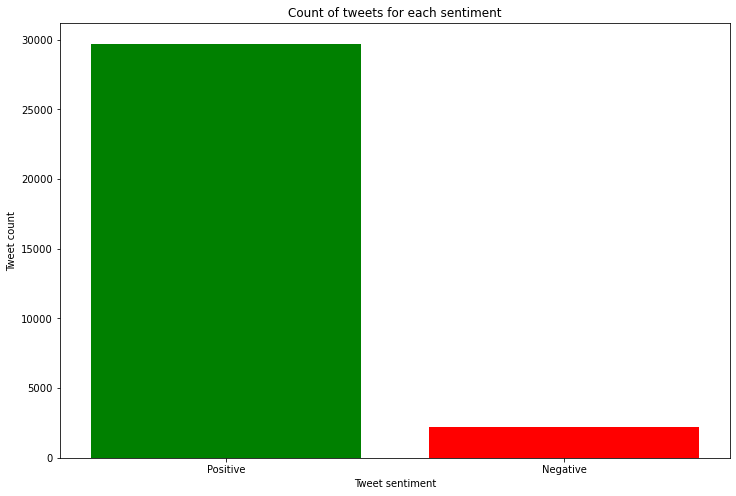

In [60]:
class_count = dataset['label'].value_counts()
plt.figure(figsize = (12, 8))
plt.xticks([0, 1], ['Positive', 'Negative'])
plt.xticks([0, 1])
plt.bar(x = class_count.keys(), 
        height = class_count.values, 
        color = ['g', 'r'])
plt.xlabel("Tweet sentiment")
plt.ylabel("Tweet count")
plt.title("Count of tweets for each sentiment")

In [61]:
print(dataset['Clean_tweet'][42])

life social network embrac day


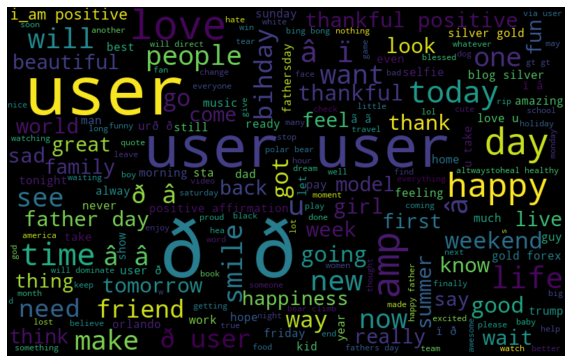

In [62]:
all_words = ' '.join([text for text in dataset['tweet']])
wordcloud = WordCloud(width=800, height=500,
                      max_font_size=110, random_state=21).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [63]:
positive_tweets = ' '.join(dataset[dataset['label'] == 0]['tweet'].str.lower())
negative_tweets = ' '.join(dataset[dataset['label'] == 1]['tweet'].str.lower())

Text(0.5, 1.0, 'Positive tweets Wordcloud')

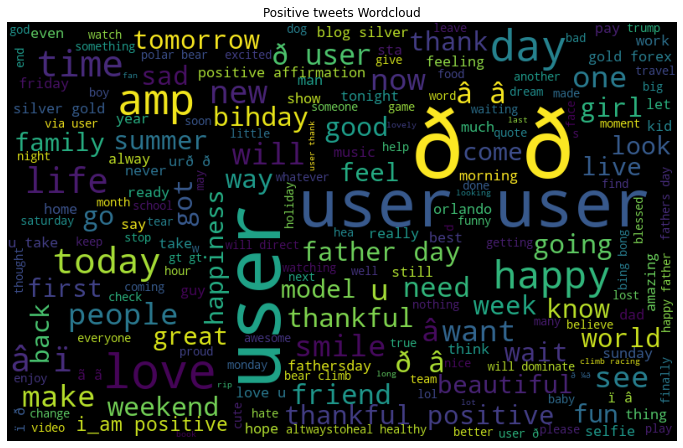

In [64]:
wordcloud = WordCloud(stopwords = STOPWORDS, width=800, height=500, 
                      random_state=41, max_font_size=110).generate(positive_tweets)
plt.figure(figsize = (12, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Positive tweets Wordcloud")

Text(0.5, 1.0, 'Negative tweets Wordcloud')

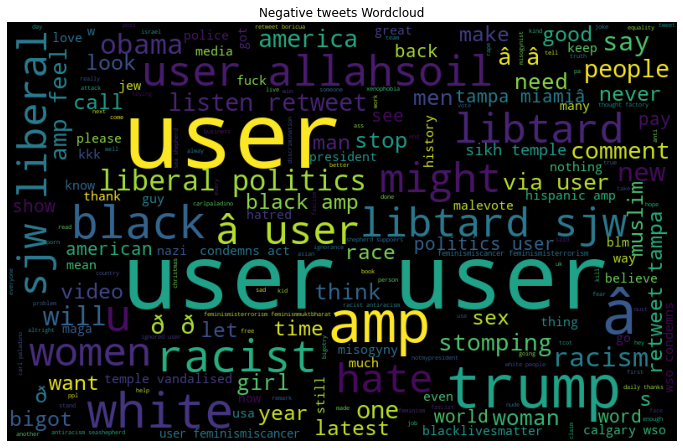

In [65]:
wordcloud = WordCloud(stopwords = STOPWORDS, width=800, height=500, 
                      random_state=41, max_font_size=110).generate(negative_tweets)
plt.figure(figsize = (12, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Negative tweets Wordcloud")

In [66]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [67]:
# extracting hashtags from non racist/sexist tweets

HT_regular = hashtag_extract(dataset['tweet'][dataset['label'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(dataset['tweet'][dataset['label'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

Now that we have prepared our lists of hashtags for both the sentiments, we can plot the top 'n' hashtags. So, first let’s check the hashtags in the non-racist/sexist tweets.

__Non-Racist/Sexist Tweets__

In [68]:
import seaborn as sns

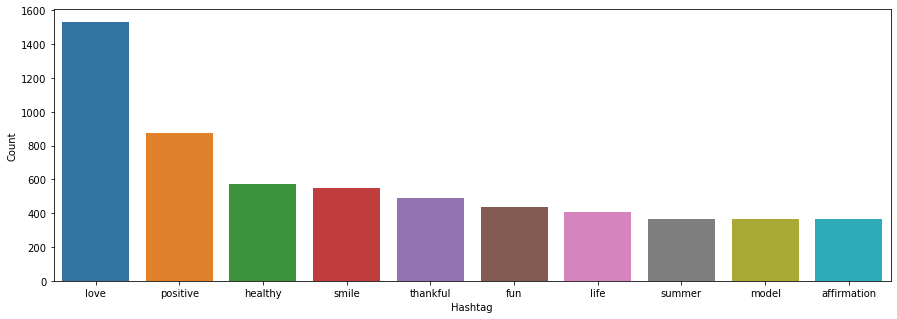

In [69]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(15,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

All these hashtags are positive and it makes sense. I am expecting negative terms in the plot of the second list. Let’s check the most frequent hashtags appearing in the racist/sexist tweets.

__Racist/Sexist Tweets__

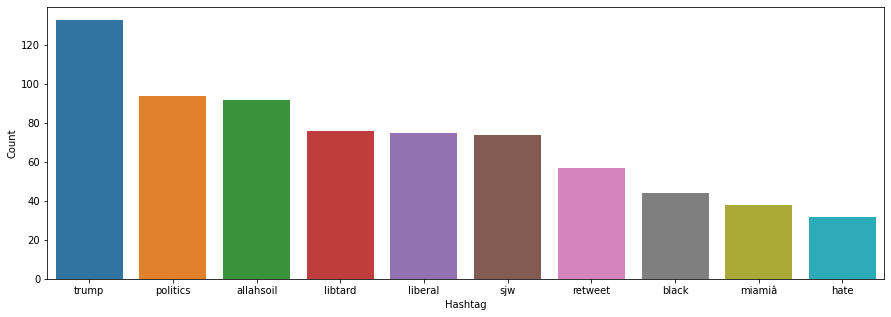

In [70]:
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})

# selecting top 10 most frequent hashtags
e = e.nlargest(columns="Count", n = 10)   
plt.figure(figsize=(15,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")